### Loading and prerequesites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import statsmodels.api as sm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_gen.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_gen.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_gen.pkl")

### Load dataset

In [3]:
df_sentiment = pd.read_pickle("../Data/df_sentiment.pkl")

In [4]:
# Merge the two dataframes while keeping only the rows that appear in both dataframes and only retaining the columns nexis_id, publication_year, sentiment, positive, neutral, negative, sentences, text_x
df = pd.merge(df, df_sentiment, on="nexis_id", how="inner")
df = df[["nexis_id", "publication_year_y", "text_x", "sentiment", "positive", "neutral", "negative", "sentences"]]

# Rename the column publication_year_y to publication_year
df = df.rename(columns={"publication_year_y": "publication_year"})

# Rename the column text_x to text
df = df.rename(columns={"text_x": "text"})

df.head()

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
0,5MNMH621JB0GF09H0000000,2017,Wenn Großbritannien Ende März den Ausstieg aus...,neutral,0.0,49.0,0.0,49.0
1,5G96X4G1JB16301D0000000,2015,Bundesrat Johann Schneider-Ammann fordert eine...,neutral,0.0,9.0,0.0,9.0
2,5GBGP2W1DXG7T4DV0000000,2015,Ryoji Noyori startet an diesem Dienstag seinen...,neutral,2.0,40.0,1.0,43.0
3,5GCJHJ51DXG7T4F90000000,2015,WASHINGTON. Für gentechnisch veränderte Lebens...,neutral,1.0,12.0,1.0,14.0
4,5JTVGKD1DXG7T27M0000000,2016,"Es falle ihr nicht leicht, die Angst der Deuts...",neutral,1.0,44.0,2.0,47.0


### General overview

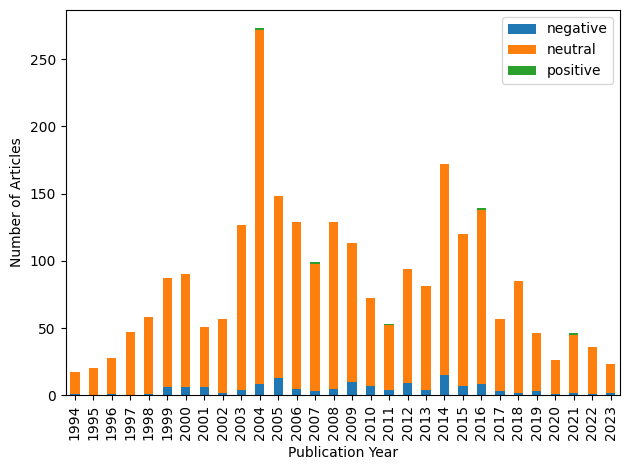

In [5]:
# Group the dataframe by publication_year and sentiment
grouped_df = df.groupby(['publication_year', 'sentiment']).size().unstack()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_gen_per_article_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.046
Model:                                  OLS   Adj. R-squared:                  0.012
Method:                       Least Squares   F-statistic:                     1.354
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):              0.254
Time:                              09:58:16   Log-Likelihood:                 64.365
No. Observations:                        30   AIC:                            -124.7
Df Residuals:                            28   BIC:                            -121.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

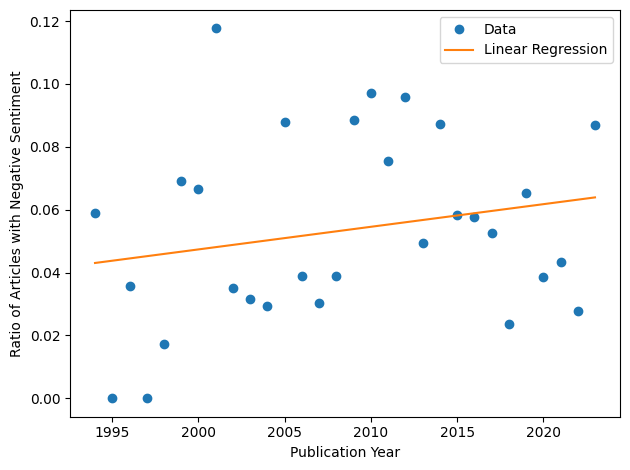

In [6]:
# Visualize the ratio of articles with negative sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with negative sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'negative').sum()})

# Calculate the ratio of articles with negative sentiment to total articles for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_gen_articles_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.060
Model:                                  OLS   Adj. R-squared:                  0.026
Method:                       Least Squares   F-statistic:                     1.774
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):              0.194
Time:                              09:58:16   Log-Likelihood:                 115.09
No. Observations:                        30   AIC:                            -226.2
Df Residuals:                            28   BIC:                            -223.4
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

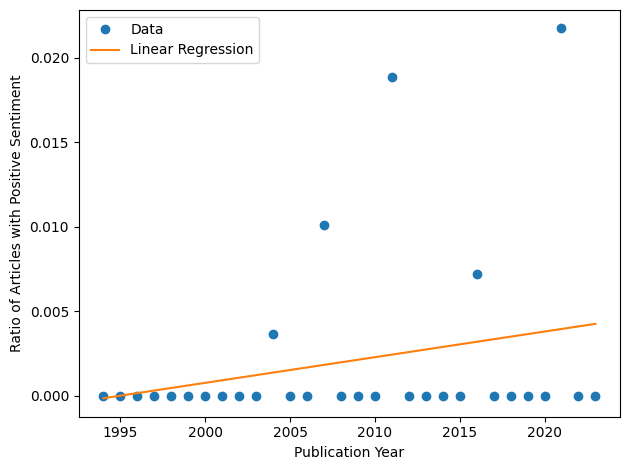

In [7]:
# Visualize the ratio of articles with positive sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with positive sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'positive').sum()})

# Calculate the ratio of articles with positive sentiment to total articles for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_gen_articles_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.066
Model:                                 OLS   Adj. R-squared:                  0.033
Method:                      Least Squares   F-statistic:                     1.975
Date:                     Wed, 14 Feb 2024   Prob (F-statistic):              0.171
Time:                             09:58:16   Log-Likelihood:                 64.280
No. Observations:                       30   AIC:                            -124.6
Df Residuals:                           28   BIC:                            -121.8
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

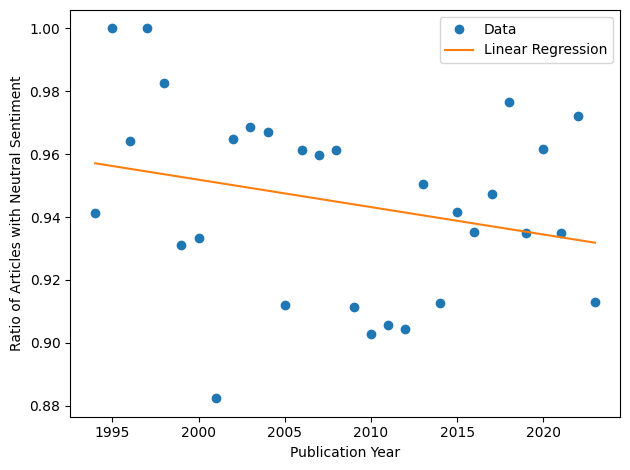

In [8]:
# Visualize the ratio of articles with neutral sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with neutral sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'neutral').sum()})

# Calculate the ratio of articles with neutral sentiment to total articles for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_gen_articles_ratio.png')
plt.show()

### Further analysis of positive articles

In [9]:
positive_articles = df[df['sentiment'] == 'positive']
positive_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
10,52C2HF41JBK921C10000000,2011,"Wir machen eine Tour durch El Cafetal, die exp...",positive,4.0,7.0,1.0,12.0
295,64CGHB91DY69V2HP0000000,2021,"I. Tolkien, ein gläubiger Katholik, leitete se...",positive,14.0,263.0,21.0,298.0
617,5JTBM6T1JDPTM5090000000,2016,Dank einiger Whistleblower wurde nun der Beipa...,positive,4.0,13.0,3.0,20.0
913,4PX69490TWH7K0V90000000,2007,"VON VOLKER MAZASSEK Die Reise der Pinguine"" fa...",positive,0.0,12.0,3.0,15.0
2320,4CRXN950TWB673090000000,2004,gentechnik Die meisten deutschen KonsumentInne...,positive,1.0,11.0,4.0,16.0


### Further analysis of negative articles

In [10]:
negative_articles = df[df['sentiment'] == 'negative']
negative_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
5,5JTVGKD1DXG7T2F00000000,2016,"Es geht um die Frage, welche Sicherheitsanford...",negative,0.0,18.0,0.0,18.0
33,4HK49440TWX271SV0000000,2004,Genfood. Klingt fremd. Ist künstlich. Erweckt ...,negative,1.0,4.0,7.0,12.0
40,4HSW9T60TWX2730J0000000,2004,Berlin - Mit cleveren Änderungen in der Gesetz...,negative,1.0,12.0,2.0,15.0
97,4GB77CD0TWX281WV0000000,2002,"Politik: Zu ""Union setzt auf Gen-Food und genv...",negative,1.0,10.0,2.0,13.0
111,4K10HRF0TWX281Y20000000,2006,Der Jugend wurden schon immer bestimmte Titel ...,negative,1.0,13.0,2.0,16.0
...,...,...,...,...,...,...,...,...
2459,64BD8FJ1F117G1NJ0000000,2000,von KATJA NICODEMUS Auf eine bodenständig-prim...,negative,2.0,27.0,1.0,30.0
2467,7V6GD2D12SDDM20J0000000,2009,Ein Kinobesuch ist auch immer ein kollektives ...,negative,0.0,16.0,3.0,19.0
2490,7XF9MJ90YC41B35W0000000,2009,WAS RICHTIG NERVTE Schweinegrippe Zensur in Ch...,negative,31.0,62.0,34.0,127.0
2492,7XVMX1R0YC41B27G0000000,2010,Dabei mag Vollzeitaktivistin Poddig es überhau...,negative,2.0,83.0,7.0,92.0


### Analysis per sentence

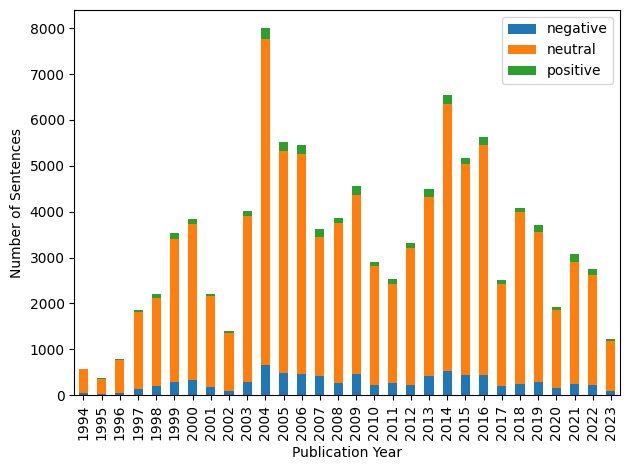

In [11]:
# Group the dataframe by publication_year and calculate the sum of positive, negative, and neutral values for each year
grouped_df = df.groupby('publication_year')[['negative', 'neutral', 'positive']].sum()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Sentences')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_gen_per_sentence_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.021
Model:                                  OLS   Adj. R-squared:                 -0.014
Method:                       Least Squares   F-statistic:                    0.5908
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):              0.449
Time:                              09:58:17   Log-Likelihood:                 89.785
No. Observations:                        30   AIC:                            -175.6
Df Residuals:                            28   BIC:                            -172.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

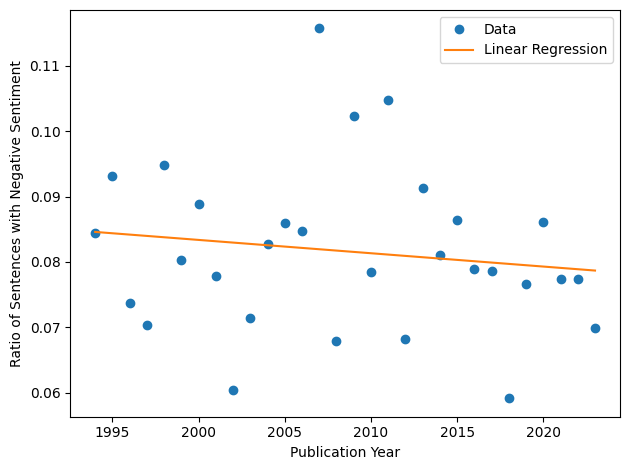

In [12]:
# Group by year and calculate the sum of negative and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'negative': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with negative sentiment to total sentences for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['negative'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_gen_sentences_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.215
Model:                                  OLS   Adj. R-squared:                  0.187
Method:                       Least Squares   F-statistic:                     7.656
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):            0.00991
Time:                              09:58:17   Log-Likelihood:                 103.05
No. Observations:                        30   AIC:                            -202.1
Df Residuals:                            28   BIC:                            -199.3
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

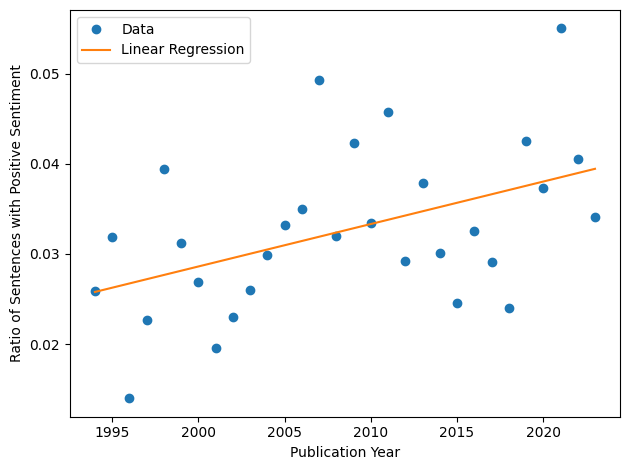

In [13]:
# Group by year and calculate the sum of positive and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'positive': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with positive sentiment to total sentences for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['positive'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_gen_sentences_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.015
Model:                                 OLS   Adj. R-squared:                 -0.020
Method:                      Least Squares   F-statistic:                    0.4400
Date:                     Wed, 14 Feb 2024   Prob (F-statistic):              0.513
Time:                             09:58:17   Log-Likelihood:                 77.187
No. Observations:                       30   AIC:                            -150.4
Df Residuals:                           28   BIC:                            -147.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

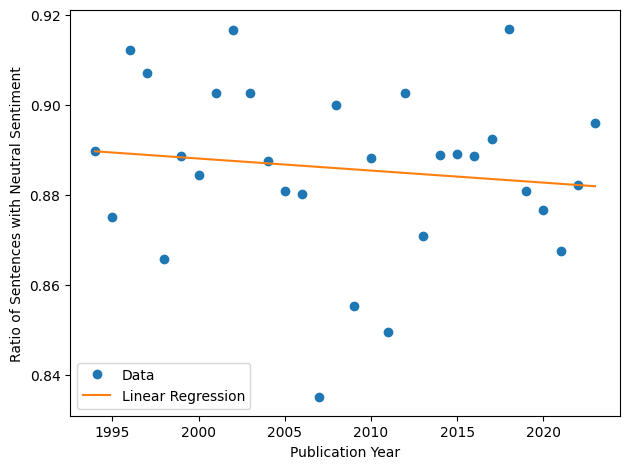

In [14]:
# Group by year and calculate the sum of neutral and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'neutral': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with neutral sentiment to total sentences for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['neutral'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_gen_sentences_ratio.png')
plt.show()

### Explore anomalies

In [15]:
df_sorted = df.sort_values('positive', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
1058,4PYHHPR0TWTB81F20000000,2007,Zusammenfassung Mittels eines überwiegend inte...,neutral,64.0,464.0,64.0,592.0
1059,528XMT01JC10031V0000000,2011,1 Einleitung Auf internationaler Ebene waren d...,neutral,55.0,677.0,67.0,799.0
1061,624438W1DYG1P4NF0000000,2021,1 Einleitung Die Nutztierhaltung ist u.a. geke...,neutral,52.0,520.0,70.0,642.0
1592,61VFTR81JCSWK1590000000,2021,"MIRAI FOODS, das einzige Schweizer Clean Meat ...",neutral,44.0,44.0,36.0,124.0
1057,4J4WHWW0TWTBC22D0000000,2006,"Sabine Gerlach, Achim Spiller und Christian Wo...",neutral,39.0,772.0,30.0,841.0
1060,5XMWBF71JC1003NP0000000,2019,1 Einleitung Viele gesamtgesellschaftliche The...,neutral,32.0,351.0,45.0,428.0
2490,7XF9MJ90YC41B35W0000000,2009,WAS RICHTIG NERVTE Schweinegrippe Zensur in Ch...,negative,31.0,62.0,34.0,127.0
799,5JW1VS61JCSWW13D0000000,2016,Bayer Große Worte Der deutsche Pharma-Riese Ba...,neutral,29.0,86.0,31.0,146.0
1062,7VHK02N12PW6P03S0000000,2009,Zusammenfassung Die Grüne Gentechnik ist ein i...,neutral,28.0,400.0,41.0,469.0
1007,554MKKG1JC4573680000000,2012,"THEATER BONN z ""Der dressierte Mann"": Von John...",neutral,25.0,119.0,17.0,161.0


In [16]:
df_sorted = df.sort_values('negative', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
732,3S3BYJD0004YT4080000000,1998,"Der Meisterkoch aus dem Basler ""Bruderholz"" ue...",neutral,21.0,169.0,76.0,266.0
72,4G9T7VX0TWX282W70000000,2000,"Von Bohlen: Lassen Sie die Tür ruhig offen, ic...",neutral,19.0,215.0,73.0,307.0
1061,624438W1DYG1P4NF0000000,2021,1 Einleitung Die Nutztierhaltung ist u.a. geke...,neutral,52.0,520.0,70.0,642.0
1059,528XMT01JC10031V0000000,2011,1 Einleitung Auf internationaler Ebene waren d...,neutral,55.0,677.0,67.0,799.0
1058,4PYHHPR0TWTB81F20000000,2007,Zusammenfassung Mittels eines überwiegend inte...,neutral,64.0,464.0,64.0,592.0
741,3WX09H80004YT03G0000000,1999,Der Mensch fuerchtet sich vor Dioxin im Poulet...,neutral,11.0,198.0,54.0,263.0
1449,66FVD341DY4BY4M80000000,2022,Ein Samstagvormittag in einem Shoppingcenter i...,neutral,7.0,166.0,46.0,219.0
1060,5XMWBF71JC1003NP0000000,2019,1 Einleitung Viele gesamtgesellschaftliche The...,neutral,32.0,351.0,45.0,428.0
1062,7VHK02N12PW6P03S0000000,2009,Zusammenfassung Die Grüne Gentechnik ist ein i...,neutral,28.0,400.0,41.0,469.0
190,7VP7VXR12SG140090000000,2009,1. Reykjavik Am Abend des 13. Oktober 2008 gin...,neutral,16.0,272.0,41.0,329.0
